### Import necessary packages and data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('NYPD_Year_To_Date_Complaints.csv')
df.head()

,BORO_NAME,DATE,TIME,CATEGORY,LOCATION OF OCCURANCE,OFFENCE DESCRIPTION,PREMISE TYPE,SUSPECT AGE GROUP,SUSPECT RACE,SUSPECT SEX,VICTIM AGE GROUP,VICTIM RACE,VICTIM SEX,"LATITUDE, LONGITUDE"
0,BRONX,03/04/2023,12:55:00,FELONY,INSIDE,ROBBERY,BANK,UNKNOWN,BLACK,M,18-24,WHITE HISPANIC,M,"(40.822882, -73.848929)"
1,STATEN ISLAND,05/19/2023,15:52:00,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,(null),<18,BLACK,M,<18,BLACK,M,NaN
2,BRONX,06/24/2023,14:35:00,VIOLATION,INSIDE,HARRASSMENT 2,(null),25-44,BLACK,M,45-64,BLACK,F,"(40.8673, -73.903374)"
3,MANHATTAN,04/01/2022,15:00:00,MISDEMEANOR,INSIDE,PETIT LARCENY,OTHER,25-44,ASIAN / PACIFIC ISLANDER,M,UNKNOWN,UNKNOWN,E,"(40.815904, -73.945123)"
4,MANHATTAN,12/29/2022,00:00:00,MISDEMEANOR,INSIDE,OFF. AGNST PUB ORD SENSBLTY &,RESIDENCE - APT. HOUSE,18-24,BLACK,M,18-24,BLACK HISPANIC,F,"(40.826268, -73.943126)"


#### Data Cleaning

In [ ]:
df.info() # inspect null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271717 entries, 0 to 271716
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   BORO_NAME              271717 non-null  object
 1   DATE                   271717 non-null  object
 2   TIME                   271717 non-null  object
 3   CATEGORY               271717 non-null  object
 4   LOCATION OF OCCURANCE  271717 non-null  object
 5   OFFENCE DESCRIPTION    271717 non-null  object
 6   PREMISE TYPE           271717 non-null  object
 7   SUSPECT AGE GROUP      271717 non-null  object
 8   SUSPECT RACE           271717 non-null  object
 9   SUSPECT SEX            271717 non-null  object
 10  VICTIM AGE GROUP       271717 non-null  object
 11  VICTIM RACE            271717 non-null  object
 12  VICTIM SEX             271717 non-null  object
 13  LATITUDE, LONGITUDE    271712 non-null  object
dtypes: object(14)
memory usage: 29.0+ MB


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y', errors='coerce')

In [ ]:
df['DATE'].isna().sum() #check missing dates after conversion

19

#### EDA

In [ ]:
# Extract out years, months and days for future usage
df['Year'] = df['DATE'].dt.year
df['Month'] = df['DATE'].dt.month_name()
df['Daily'] = df['DATE'].dt.day_name()

df1 = df[df['Year'].isin([2020, 2021, 2022, 2023])]
yearly_crime_counts = df['Year'].value_counts().sort_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                       'August', 'September', 'October', 'November', 'December']
monthly_crime_counts = df1['Month'].value_counts().sort_index()
sorted_monthly_crime_counts = monthly_crime_counts.reindex(month_order)
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_crime_counts = df1['Daily'].value_counts().sort_index()
sorted_daily_crime_counts = daily_crime_counts.reindex(day_order)
premise_counts = df['PREMISE TYPE'].value_counts().sort_index()
boro_counts = df['BORO_NAME'].value_counts().sort_index()
sus_sex_race = df.groupby(['SUSPECT RACE', 'SUSPECT SEX']).size().reset_index(name='Number of Crimes')
vic_sex_race = df.groupby(['VICTIM RACE', 'VICTIM SEX']).size().reset_index(name='Number of Crimes')


In [ ]:
#monthly_crime_counts_df = pd.DataFrame({'Crime_counts': monthly_crime_counts})
monthly_mean = monthly_crime_counts.mean()

In [ ]:
daily_mean = daily_crime_counts.mean()

### Data Visualization

#### bar plots

In [ ]:
#utlize plotly
import plotly.express as px
import plotly.graph_objs as go
#bar plots of number of crimes per year, month, and daily basis

fig_year = px.line(yearly_crime_counts,
                      labels={'index': 'Year', 'value': 'Number of Crimes'},
                      title='Number of Crimes Per Year')
fig_year.update_layout(xaxis_title="Year", yaxis_title="Number of Crimes")
fig_year.show()

 The year-wise crime plot indicates a notable spike in reported crimes in the most recent year, 2023, suggesting a data anomaly that could be due to incomplete data for the current year, or a change in data recording practices. The plot also shows a relatively stable crime rate prior to the spike, but without additional context or data validation, these observations remain speculative. In this way, counts by different year might not be very informative as I firstly imagined.

In [ ]:
# There is no need to include year before 2020 as data before that year is not very informative
# below bar graph only contains crime records from 2020 to 2023
fig_month = px.bar(sorted_monthly_crime_counts,
                      labels={'index': 'Month', 'value': 'Number of Crimes'},
                      title='Number of Crimes Per Month')
fig_month.update_layout(xaxis_title="Month", yaxis_title="Number of Crimes")
fig_month.update_traces(texttemplate='%{y}', textposition='outside')

horizontal_line_y = monthly_mean # using the average of crime counts by month as a reference

line_trace = go.Scatter(x=[fig_month.data[0].x[0], fig_month.data[0].x[-1]],
                        y=[horizontal_line_y, horizontal_line_y],
                        mode='lines',
                        line=dict(color='red', width=2),
                        name='Monthly Average Crime counts')
fig_month.add_trace(line_trace)
fig_month.show()

fig_day = px.bar(sorted_daily_crime_counts,
                      labels={'index': 'Daily', 'value': 'Number of Crimes'},
                      title='Number of Crimes Per Day')
fig_day.update_layout(xaxis_title="Day", yaxis_title="Number of Crimes")
fig_day.update_traces(texttemplate='%{y}', textposition='outside')

horizontal_line_y1 = daily_mean

line_trace1 = go.Scatter(x=[fig_day.data[0].x[0], fig_day.data[0].x[-1]],
                        y=[horizontal_line_y1, horizontal_line_y1],
                        mode='lines',
                        line=dict(color='red', width=2),
                        name='Daily Average Crime counts')
fig_day.add_trace(line_trace1)

fig_day.show()


The monthly bar plot displays a noticeable fluctuation, suggesting higher crime rates during late winter, spring and early summer months and anomalously low figures in others such as July to December. These irregularities could point to data collection issues or actual seasonal trends.

The daily basis plot illustrates a distribution of crime occurrences across the week, with Wednesday and Friday showing a marginally higher frequency, and Sunday the lowest. The data suggests a relatively consistent pattern of crime throughout the week, with slight variations. The increased numbers on Fridays and Wednesdays could imply a rise in weekend or midweek activities that correlate with crime rates, while the dip on Sundays might indicate a lull in criminal activity, possibly due to lower social activity or increased police presence during typical rest days.

In [ ]:
fig_suspect = px.bar(sus_sex_race,
                     x='SUSPECT RACE',
                     y='Number of Crimes',
                     color='SUSPECT SEX', # hue
                     barmode='group',
                     labels={'SUSPECT RACE': 'Race', 'Number of Crimes': 'Number of Crimes'},
                     title='Number of Crimes by Race and Sex')
fig_suspect.update_layout(xaxis_title="Race", yaxis_title="Number of Crimes")
fig_suspect.show()

The above bar chart presents a breakdown of crime occurrences with respect to the suspect's race and sex. It shows that the highest number of crimes are associated with suspects identified as Black, followed by White Hispanic and White. The distribution also illustrates a gender disparity, with males (M) being far more frequently associated with crimes than females (F), across all racial categories. Notably, there's a significant count of crimes associated with suspects of unknown race and sex, and a small proportion where this information is not recorded (null). This visualization underscores the importance of considering demographic factors in crime analysis and may reflect societal or systemic issues related to crime and law enforcement practices.

In [ ]:
fig_victim = px.bar(vic_sex_race,
                     x='VICTIM RACE',
                     y='Number of Crimes',
                     color='VICTIM SEX', # hue
                     barmode='group',
                     labels={'VICTIM RACE': 'Race', 'Number of Crimes': 'Number of Crimes'},
                     title="Number of Crimes by Victims' Race and Sex")
fig_victim.update_layout(xaxis_title="Race", yaxis_title="Number of Crimes")
fig_victim.show()

In [ ]:
valid_age_groups = ['18-24', '<18', '45-64', '25-44', '65+']

df2 = df[df['SUSPECT AGE GROUP'].isin(valid_age_groups) |
                       df['VICTIM AGE GROUP'].isin(valid_age_groups)]

df2['SUSPECT AGE GROUP'] = df2['SUSPECT AGE GROUP'].apply(lambda x: x if x in valid_age_groups else None)
df2['VICTIM AGE GROUP'] = df2['VICTIM AGE GROUP'].apply(lambda x: x if x in valid_age_groups else None)

<ipython-input-12-d4249be56af4>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-12-d4249be56af4>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



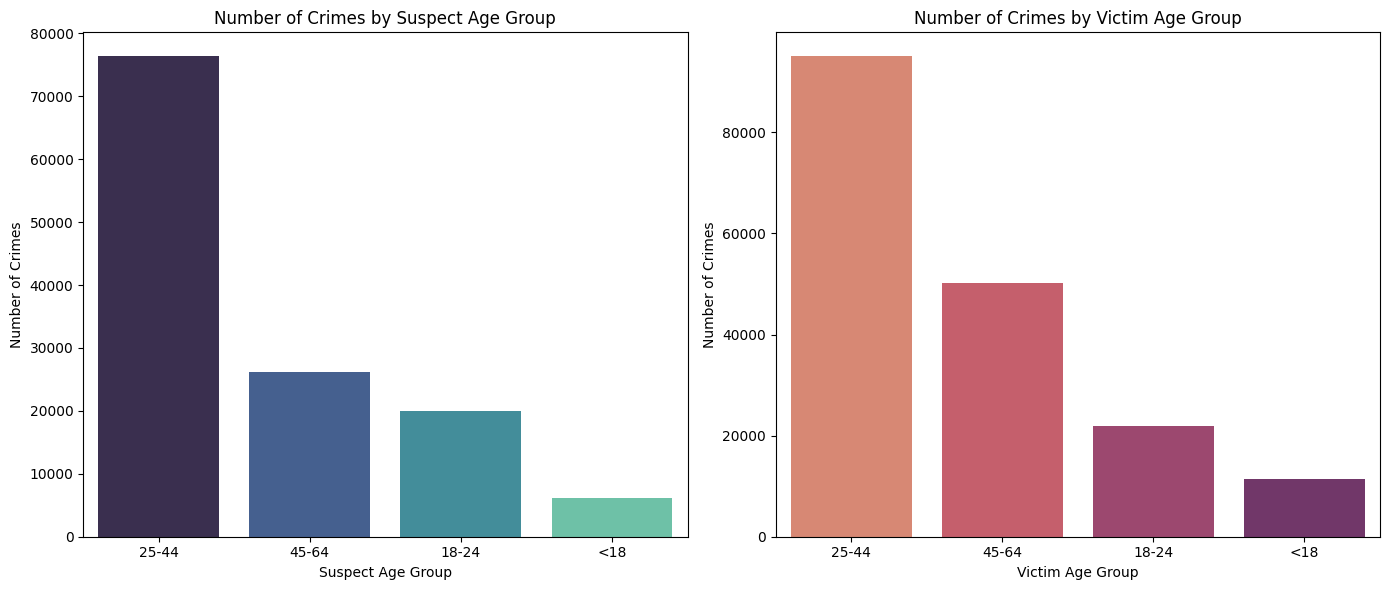

In [ ]:
suspect_age_counts = df2['SUSPECT AGE GROUP'].value_counts()
victim_age_counts = df2['VICTIM AGE GROUP'].value_counts()

plt.figure(figsize=(14, 6))

# Bar graph for SUSPECT AGE GROUP
plt.subplot(1, 2, 1)
sns.barplot(x=suspect_age_counts.index, y=suspect_age_counts.values, palette="mako")
plt.title('Number of Crimes by Suspect Age Group')
plt.xlabel('Suspect Age Group')
plt.ylabel('Number of Crimes')

# Bar graph for VICTIM AGE GROUP
plt.subplot(1, 2, 2)
sns.barplot(x=victim_age_counts.index, y=victim_age_counts.values, palette="flare")
plt.title('Number of Crimes by Victim Age Group')
plt.xlabel('Victim Age Group')
plt.ylabel('Number of Crimes')

plt.tight_layout()
plt.show()

The provided bar graphs show crime counts categorized by age groups for suspects and victims, with adults aged 25-44 being the most common in both categories. They are followed by the 45-64 age group, young adults aged 18-24, and minors under 18. The data indicates that prime adults are the most affected by crime, whether as perpetrators or victims. This information could guide targeted crime prevention and intervention programs for the 25-44 age demographic.

#### pie charts

In [ ]:
category_counts = df['CATEGORY'].value_counts()
# pie chart of number of crimes by different category
fig_pie = px.pie(category_counts, names=category_counts.index, values=category_counts.values,
                 title='Distribution of Crimes by Category')
fig_pie.update_traces(textposition='inside', textinfo='percent+label')
fig_pie.show()


This pie chart suggests that misdemeanors are the most common type of crime, constituting just over half of all incidents, followed by felonies at one-third, and violations being the least common at around one-sixth. This distribution could imply that while more serious crimes (felonies) are a significant concern, less severe but more frequent offenses (misdemeanors) make up the bulk of crime incidents. The relatively smaller slice for violations might indicate that these are less frequently reported or occur less often.

#### Line plots

In [ ]:
# line plots of number of crimes by dfferent premise types
fig_premise = px.line(premise_counts,
                      labels={'index': 'Premise type', 'value': 'Number of Crimes'},
                      title='Number of Crimes by Premise types')
fig_premise.update_layout(xaxis_title="Premise types", yaxis_title="Number of Crimes")
fig_premise.show()

The chart indicates that certain premises, particularly "RESIDENCE - APT. HOUSE" and "PUBLIC HOUSING," have a markedly high number of reported crimes compared to other locations, with peaks that far exceed the counts for other premise types. This could be reflective of the higher population density and reporting rates in residential areas. Conversely, some categories, such as "BANK," "CHAIN STORE," and others, exhibit relatively fewer crimes.

In [ ]:
# line plots of number of crimes by dfferent borough in NYC
fig_premise = px.line(boro_counts,
                      labels={'index': 'Borough Name', 'value': 'Number of Crimes'},
                      title='Number of Crimes by different boroughs')
fig_premise.show()

The line chart titled "Number of Crimes by different boroughs" illustrates the distribution of crime across several boroughs of New York City, along with an unidentified category labeled "(null)." The x-axis lists the boroughs, and the y-axis shows the number of crimes, with counts ranging from 0 to approximately 80,000. Brooklyn exhibits the highest crime count, followed by Manhattan, Bronx, Queens, and Staten Island, which has the lowest count among the specified boroughs. The "(null)" category could indicate missing data or unclassified regions. This visualization suggests that crime distribution is uneven across the boroughs, with Brooklyn and Manhattan having significantly higher crime rates than the other boroughs. The chart effectively communicates the relative crime frequency per borough, which is crucial information for resource allocation and policy-making in crime prevention and law enforcement.

In [ ]:
df['Hour'] = pd.to_datetime(df['TIME'], format='%H:%M:%S').dt.hour
df2 = df.groupby('Hour').size().reset_index(name='Number_of_Crimes')
fig_2023 = px.line(df2, x='Hour', y='Number_of_Crimes',
                   labels={'index': 'Time of the day', 'value': 'Number of Crimes'},
                   title='Number of Crimes by different times of the day in 2023')
fig_2023.update_layout(xaxis_title="Time of the day", yaxis_title="Number of Crimes",
                       xaxis=dict(tickmode='linear', tick0=0, dtick=1))  # Ensure hourly ticks
fig_2023.show()

The above line plot depicts the frequency of crime incidents throughout a 24-hour period. The x-axis represents the hours of the day, from midnight to 23:00, and the y-axis shows the number of crimes reported. The chart reveals a diurnal pattern of crime occurrences, with the lowest number of crimes typically reported in the early morning hours. There is a noticeable increase in crime from the early hours towards midday, with a peak around late evening. The pattern suggests that crime rates are higher during the evening and night hours, peaking around 18:00 to 19:00, which might correspond to the time people are most active outside their homes. This visualization can provide law enforcement agencies with valuable insights into when crimes are most likely to occur, potentially informing patrol schedules and crime prevention strategies.

#### Geo plot

In [ ]:
!pip install geoplot

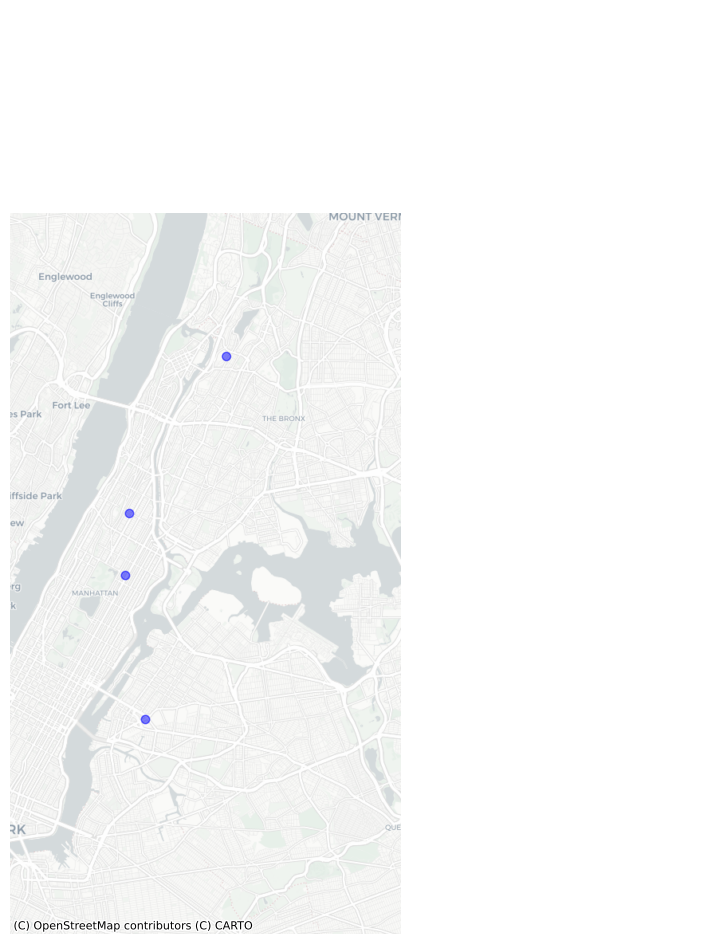

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Extract latitude and longitude from the 'LATITUDE, LONGITUDE' column
df[['Latitude', 'Longitude']] = df['LATITUDE, LONGITUDE'].str.extract(r'\((.*), (.*)\)').astype(float)

# Drop NaN values
df = df.dropna(subset=['Latitude', 'Longitude'])

# Find the most frequent crime type per borough with its count
most_frequent_crimes = df.groupby(['BORO_NAME', 'OFFENCE DESCRIPTION'])\
                         .size().reset_index(name='Crime counts')
most_frequent_crimes = most_frequent_crimes.sort_values('Crime counts', ascending=False)\
                                           .drop_duplicates(['BORO_NAME'])

# Merge the most frequent crimes with the latitude and longitude for each borough
merged_data = pd.merge(df, most_frequent_crimes, on=['BORO_NAME', 'OFFENCE DESCRIPTION'], how='inner')\
                .drop_duplicates(subset='BORO_NAME')

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(merged_data, geometry=gpd.points_from_xy(merged_data.Longitude, merged_data.Latitude))

# Define the coordinate reference system for New York (EPSG:4326 is standard WGS84 lat/long)
gdf.crs = 'EPSG:4326'

# Convert the GeoDataFrame to the Web Mercator projection (EPSG:3857) for use with contextily
gdf = gdf.to_crs(epsg=3857)

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(12, 12))
gdf.plot(ax=ax, color='blue', alpha=0.5)

# Add the contextily basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Set the axis limits to focus on NYC
ax.set_xlim([-8237254.671, -8203780.514])
ax.set_ylim([4965028.076, 5009377.085])

# Remove axis for a cleaner look
ax.axis('off')

# Show the plot
plt.show()

geo_fig = px.scatter_geo(merged_data,
                         lat='Latitude',
                         lon='Longitude',
                         color='BORO_NAME',
                         size='Crime counts',
                         hover_name='BORO_NAME',
                         hover_data=['OFFENCE DESCRIPTION', 'Crime counts'],
                         title='Geographical Distribution of Most Frequent Crimes by Borough',
                         scope='usa',  # Focus map scope to USA
                         center={"lat": 40.7128, "lon": -74.0060},  # Center the map at New York's latitude and longitude
                         fitbounds="locations"  # Automatically adjust the zoom to fit the locations
                        )

# Show the plot
geo_fig.show()

By referencing the above two plots, the first plots displays the exact location of those five areas this dataset contains where crimes are happening. And the plot shows that Manhattan has the highest number of crime counts among all five boroughs in the Greater New York area; and Staten Island has the least crime counts. By examine the second geo plot, it shows the most common crime type happened in Manhatten, Queens and Brooklyn is Petit Larceny; And Harresment 2 is the most frequent crime type in Bronx and Staten Island. Due to data collection issues, there are some crime records that are not categorized or classified.